In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import emoji
import jaconv

In [2]:
cd ../

C:\Users\井原輝人\Desktop\sorcecode\twitter-compe


In [3]:
train_df = pd.read_csv('./data/preprosessing_train.csv')

In [4]:
X_df_train = train_df[["is_url","is_location","num_emoji","num_reply","num_hash","text_length","num_kusa","is_date","is_time","text_wakati"]]
Y_df_train = train_df["flg"].astype(np.int64)
X_train =  X_df_train.values
y_train = Y_df_train.values
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, random_state=1)


In [5]:
X_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20285 entries, 0 to 20284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   is_url       20285 non-null  float64
 1   is_location  20285 non-null  float64
 2   num_emoji    20285 non-null  float64
 3   num_reply    20285 non-null  float64
 4   num_hash     20285 non-null  float64
 5   text_length  20285 non-null  float64
 6   num_kusa     20285 non-null  float64
 7   is_date      20285 non-null  float64
 8   is_time      20285 non-null  float64
 9   text_wakati  20285 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = CountVectorizer()
# トレーニング用データにCountVectorizerを適用
X_train_cv = cv.fit_transform(X_train[:,9])


# バリデーション用データにCountVectorizerを適用
X_valid_cv = cv.transform(X_valid[:,9])



In [7]:
X_train.shape

(16228, 10)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score, recall_score,f1_score
import seaborn as sns
def result_heatmap(Y_test,Y_pred):
    print("正解率:"+str(accuracy_score(Y_test, Y_pred)))
    print("適合率:"+str(recall_score(Y_test,Y_pred)))
    print("再現率:"+str(precision_score(Y_test,Y_pred)))
    print("F値:"+str(f1_score(Y_test, Y_pred)))  
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm,annot=True, cmap='Blues')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,
                                    random_state=1)
model.fit(X_train_cv, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

正解率:0.9689425684002958
適合率:0.5971731448763251
再現率:0.9337016574585635
F値:0.728448275862069


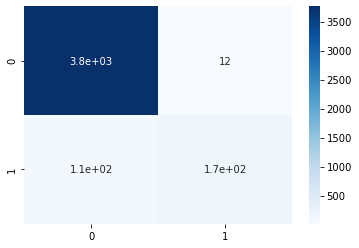

In [13]:
#普通にやると全部違う方に分類される
y_pred = model.predict(X_valid_cv)
result_heatmap(y_valid,y_pred)

In [15]:
y_pred_proba = model.predict_proba(X_valid_cv)
print(y_pred_proba)

[[0.996  0.004 ]
 [0.906  0.094 ]
 [0.8568 0.1432]
 ...
 [0.984  0.016 ]
 [0.998  0.002 ]
 [0.992  0.008 ]]


In [16]:
X_train2 = X_train[:,:8]
X_valid2 = X_valid[:,:8]

In [17]:
print(X_train2)

[[0.0 0.0 0.0 ... 53.0 0.0 0.0]
 [0.0 0.0 0.0 ... 110.0 0.0 0.0]
 [0.0 0.0 0.0 ... 47.0 0.0 0.0]
 ...
 [0.0 1.0 0.0 ... 89.0 1.0 0.0]
 [1.0 0.0 0.0 ... 152.0 0.0 0.0]
 [1.0 1.0 0.0 ... 55.0 1.0 0.0]]


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = make_pipeline(StandardScaler(),
                       RandomForestClassifier(n_estimators=500,random_state=1)
                       )

In [19]:
pipe_lr.fit(X_train2,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=Fals

正解率:0.9314764604387479
適合率:0.2332155477031802
再現率:0.5196850393700787
F値:0.32195121951219513


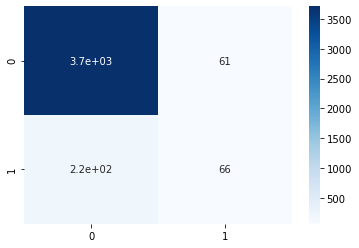

In [21]:
y_pred2= pipe_lr.predict(X_valid2)

result_heatmap(y_valid,y_pred2)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l1']},
              {'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l2']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)